In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

In [3]:
# Read city data file and store in Pandas DF
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read ride data file and store in Pandas DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [8]:
# Check for null rows
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the type of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Get unique values of city types
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
print(sum(city_data_df["type"]=="Urban"), sum(city_data_df["type"]=="Suburban"), sum(city_data_df["type"]=="Rural"))

66 36 18


In [12]:
# Check for null rows
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Merge the DataFrames
pyber_data_df = pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [19]:
# Create city type DataFrames
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [26]:
# Ride count for each city.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [28]:
# Average fare for each city.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [29]:
# Driver count for each city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

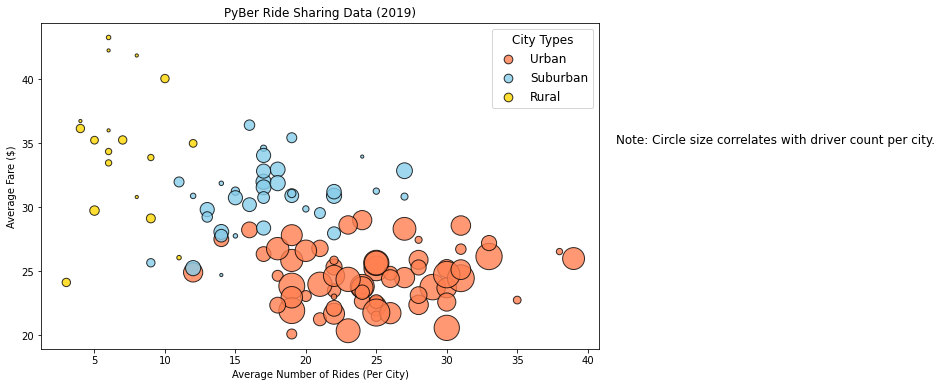

In [40]:
# Build the scatter plot for each type of city
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=[i*10 for i in urban_driver_count],
            edgecolors="black",
            linewidths=1, color="coral",
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=[i*10 for i in suburban_driver_count],
            edgecolors="black",
            linewidths=1, c="skyblue",
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=[i*10 for i in rural_driver_count],
            edgecolors="black",
            linewidths=1, c="gold",
            alpha=0.8, label="Rural")

# graph properties
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Average Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# save the figure
plt.savefig("../PyBer-Analysis/Analysis/Fig1.png")

# show graph
plt.show()

In [51]:
# Import NumPy and stats module from SciPy
import numpy as np
import scipy.stats as sts

In [52]:
# Measures of central tendency for ride count for urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [53]:
# Measures of central tendency for ride count for suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [54]:
# Measures of central tendency for ride count for rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [55]:
# Fares for each type of city.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [56]:
# Measures of central tendency for the average fare for urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is {mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is {median_urban_fares}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is 24.53.
The median fare price for urban trips is 24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [57]:
# Measures of central tendency for the average fare for suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is {median_suburban_fares}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is 30.97.
The median fare price for suburban trips is 30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [58]:
# Measures of central tendency for the average fare for rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is {mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is {median_rural_fares}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is 34.62.
The median fare price for rural trips is 37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [59]:
# Driver count for each type of city.
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [60]:
# Measures of central tendency for number of drivers for urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The average number of driver in urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for number of drivers in urban cities is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for number of drivers in urban cities is {mode_urban_drivers}.")

The average number of driver in urban cities is 36.68.
The median for number of drivers in urban cities is 37.0.
The mode for number of drivers in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [64]:
# Measures of central tendency for number of drivers for suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The average number of drivers in suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for number of drivers in suburban cities is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for number of drivers in suburban cities is {mode_suburban_drivers}.")

The average number of drivers in suburban cities is 13.71.
The median for number of drivers in suburban cities is 16.0.
The mode for number of drivers in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [62]:
# Measures of central tendency for number of drivers for rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The average number of driver in rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median for number of drivers in rural cities is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for number of drivers in rural cities is {mode_rural_drivers}.")

The average number of driver in rural cities is 4.30.
The median for number of drivers in rural cities is 4.0.
The mode for number of drivers in rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


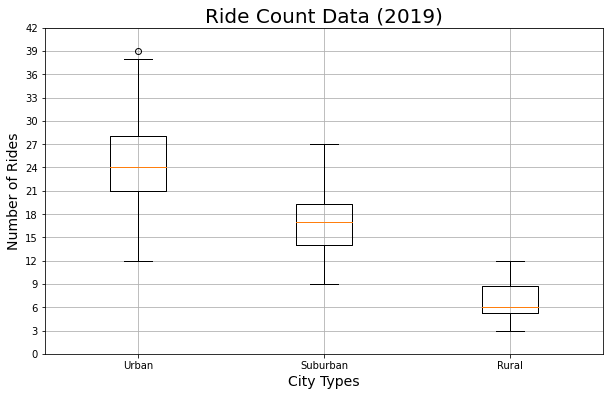

In [77]:
# Box-and-Whisker Plot for Ride Count in each type of city.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10,6))
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize='20')
ax.set_xlabel('City Types', fontsize='14')
ax.set_ylabel('Number of Rides', fontsize='14')
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

plt.savefig("../PyBer-Analysis/Analysis/Fig2.png")
plt.show()

In [78]:
# Get the city that matches 39.
print(f"{urban_ride_count[urban_ride_count==39].index[0]} has the highest rider count.")

West Angela has the highest rider count.


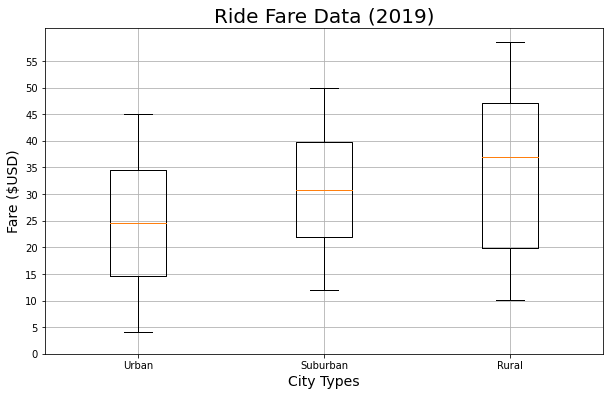

In [83]:
# Box-and-Whisker Plot for Avg. Fare($) in each type of city.
fig, ax = plt.subplots(figsize=(10,6))
fare_data = [urban_fares, suburban_fares, rural_fares]

ax.boxplot(fare_data, labels=x_labels)
ax.set_title('Ride Fare Data (2019)', fontsize='20')
ax.set_xlabel('City Types', fontsize='14')
ax.set_ylabel('Fare ($USD)', fontsize='14')
ax.set_yticks(np.arange(0,56, step=5.0))
ax.grid()

plt.savefig("../PyBer-Analysis/Analysis/Fig3.png")
plt.show()

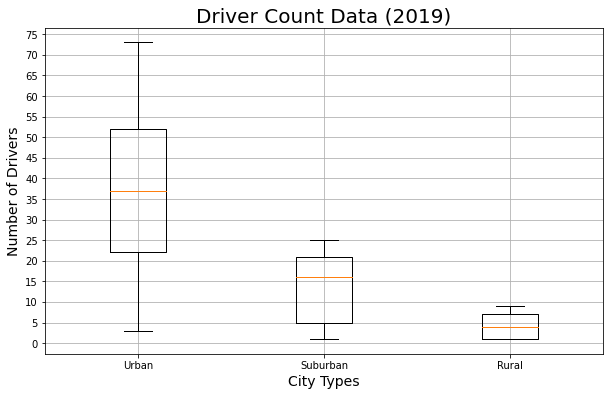

In [89]:
# Box-and-Whisker Plot for Driver Count in each type of city.
fig, ax = plt.subplots(figsize=(10,6))
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
ax.boxplot(driver_data, labels=x_labels)

ax.set_title('Driver Count Data (2019)', fontsize='20')
ax.set_xlabel('City Types', fontsize='14')
ax.set_ylabel('Number of Drivers', fontsize='14')
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()

plt.savefig("../PyBer-Analysis/Analysis/Fig4.png")
plt.show()